<a href="https://colab.research.google.com/github/gkdivya/NLP_Notebooks/blob/main/Capstone_PythonCodeGenerator%5CGloVe_Training_PythonCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import base64
import requests

master = "https://raw.githubusercontent.com/gkdivya/NLP_Notebooks/main/Capstone_PythonCodeGenerator/assets/codeDS.txt"
req = requests.get(master)
text = req.text

In [30]:
import tokenize

with tokenize.open('/content/codeDS.txt') as f:
  for token_type, content, _, _, line in tokenize.generate_tokens(f.readline):
    print(tokenize.tok_name.get(token_type, token_type), content)

Streaming output truncated to the last 5000 lines.
NL 

NL 

NAME print
OP (
STRING "All keys maximum : "
OP +
NAME str
OP (
NAME res
OP )
OP )
NL 

NL 

NL 

NAME test_dict
OP =
OP {
STRING 'gfg'
OP :
NUMBER 2
OP ,
STRING 'is'
OP :
STRING 'hello'
OP ,
STRING 'best'
OP :
NUMBER 2
OP ,
STRING 'for'
OP :
OP {
STRING '1'
OP :
NUMBER 3
OP }
OP ,
STRING 'geeks'
OP :
NUMBER 4
OP }
NL 

NL 

NAME print
OP (
STRING "The original dictionary is : "
OP +
NAME str
OP (
NAME test_dict
OP )
OP )
NL 

NL 

NAME targ_type
OP =
NAME int
NL 

NL 

NAME res
OP =
OP [
OP ]
NL 

NAME for
NAME key
OP ,
NAME val
NAME in
NAME test_dict
OP .
NAME items
OP (
OP )
OP :
NL 

NL 

NAME if
NAME isinstance
OP (
NAME val
OP ,
NAME targ_type
OP )
OP :
NL 

NAME res
OP .
NAME append
OP (
NAME key
OP )
NL 

NL 

NAME print
OP (
STRING "The extracted keys : "
OP +
NAME str
OP (
NAME res
OP )
OP )
NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

NL 

N

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
glove_model[":"]

array([ 9.6348e-02, -2.1428e-01,  1.4032e-01, -5.4121e-02,  7.0784e-01,
        3.0685e-01, -5.2486e-01, -3.3833e-01, -2.8387e-01, -1.2774e+00,
        5.1377e-01,  1.7126e-01, -2.8613e-01,  5.4132e-01, -7.4425e-02,
       -3.3252e-02, -2.9590e-01,  8.0981e-02, -6.3806e-02, -7.3213e-02,
       -4.1156e-01,  1.1687e-01,  1.2094e-01,  4.9449e-01,  6.1293e-02,
        3.4174e-01, -2.3417e-01,  1.1166e-01,  5.6356e-02, -1.9031e-01,
        3.3555e-01,  4.0812e-01, -6.8226e-01,  3.7756e-01, -8.6153e-01,
       -1.3947e-01,  6.4209e-01, -4.8695e-01, -3.3999e-01,  4.2018e-01,
        2.1717e-01, -1.6075e-01, -2.8407e-02,  6.3021e-01, -1.8257e-02,
       -4.9945e-01,  1.0085e-01,  4.3350e-01, -3.7103e-01,  1.1859e-01,
        2.5102e-01, -1.9302e-01,  2.0327e-01,  2.8940e-01, -5.1597e-01,
        5.0903e-01, -2.1061e-01, -2.9143e-01,  4.0494e-01, -1.2696e-01,
        7.5173e-01,  5.5155e-01,  4.4915e-02, -2.7044e-01, -3.3187e-01,
        1.7320e-02,  2.8298e-01,  3.8573e-02,  5.5289e-02, -2.70

Hallo leute! Today’s post we will implement the awesome model to learn word embeddings Glove: Global Vectors for Word Representation, using Pytorch. Developed by Stanford, the main idea is to leverage the matrix of word cooccurrences in order to extract “dimensions of meaning”, outputing word vectors that naturally captures word semantics and thus being useful representations in a lot of tasks, such word analogies. You can find more information in the original paper here .

For this project, we will use the text8 dataset (that can be download here). This dataset is a dump of cleaned wikipedia texts. More details here .

First, we just import the necessary libs.

In [ ]:
datasetfile = open("/content/english_python_data.txt", "r")

In [ ]:
code_datasetfile = open("https://github.com/gkdivya/NLP_Notebooks/blob/main/Capstone_PythonCodeGenerator/assets/codeDS.txt", "w+") 

In [ ]:
with open('https://github.com/gkdivya/NLP_Notebooks/blob/main/Capstone_PythonCodeGenerator/assets/english_python_data.txt') as f:
    for line in f:
        if not (line.strip().startswith('#')):
            #extraction only python code
            code = line.split("#")
            code_datasetfile.write(code[0])

In [ ]:
txt = "    presentday = datetime.now() # or presentday = datetime.today() "

x = txt.split("#")

print(x[0])

    presentday = datetime.now() 


In [ ]:
from collections import Counter, defaultdict
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.manifold import TSNE

Next we will create a dataset class to manage our feature extraction and batch generation. We must create a cooccurence matrix for every word to feed the glove model. We will generate a vocab of ~190k words. If we create a common matrix, it would have 190000² entries, which would result in ~36 billion entries. If we consider each value a 32bit integer, we are talking of ~135GB of memory, too much to store and process. To handle this issue we can leverage the fact that most of the entries of this matrix are 0 so we just need to store the non-zero values, which drastically reduce the amount of memory necessary.

In [ ]:
class GloveDataset:

  def __init__(self, text, n_words=200000, window_size=5):
      self._window_size = window_size
      self._tokens = text.split(" ")[:n_words]
      word_counter = Counter()
      word_counter.update(self._tokens)
      self._word2id = {w:i for i, (w,_) in enumerate(word_counter.most_common())}
      self._id2word = {i:w for w, i in self._word2id.items()}
      self._vocab_len = len(self._word2id)

      self._id_tokens = [self._word2id[w] for w in self._tokens]

      self._create_coocurrence_matrix()

      print("# of words: {}".format(len(self._tokens)))
      print("Vocabulary length: {}".format(self._vocab_len))

  def _create_coocurrence_matrix(self):
      cooc_mat = defaultdict(Counter)
      for i, w in enumerate(self._id_tokens):
          start_i = max(i - self._window_size, 0)
          end_i = min(i + self._window_size + 1, len(self._id_tokens))
          for j in range(start_i, end_i):
              if i != j:
                  c = self._id_tokens[j]
                  cooc_mat[w][c] += 1 / abs(j-i)

      self._i_idx = list()
      self._j_idx = list()
      self._xij = list()

      #Create indexes and x values tensors
      for w, cnt in cooc_mat.items():
          for c, v in cnt.items():
              self._i_idx.append(w)
              self._j_idx.append(c)
              self._xij.append(v)

      self._i_idx = torch.LongTensor(self._i_idx).cuda()
      self._j_idx = torch.LongTensor(self._j_idx).cuda()
      self._xij = torch.FloatTensor(self._xij).cuda()


  def get_batches(self, batch_size):
      #Generate random idx
      rand_ids = torch.LongTensor(np.random.choice(len(self._xij), len(self._xij), replace=False))

      for p in range(0, len(rand_ids), batch_size):
          batch_ids = rand_ids[p:p+batch_size]
          yield self._xij[batch_ids], self._i_idx[batch_ids], self._j_idx[batch_ids]
!unzip text8.zip
dataset = GloveDataset(open("/content/codeDS.txt").read(), 10000000)

unzip:  cannot find or open text8.zip, text8.zip.zip or text8.zip.ZIP.
# of words: 168952
Vocabulary length: 18133


Here we create the class of our glove model. In its forward pass it will perform the yellow part of the Glove loss function, described in the original paper:

![](https://cdn.hashnode.com/res/hashnode/image/upload/v1587152473299/6HedPZypj.png?auto=compress)


In [ ]:
EMBED_DIM = 300
class GloveModel(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super(GloveModel, self).__init__()
        self.wi = nn.Embedding(num_embeddings, embedding_dim)
        self.wj = nn.Embedding(num_embeddings, embedding_dim)
        self.bi = nn.Embedding(num_embeddings, 1)
        self.bj = nn.Embedding(num_embeddings, 1)

        self.wi.weight.data.uniform_(-1, 1)
        self.wj.weight.data.uniform_(-1, 1)
        self.bi.weight.data.zero_()
        self.bj.weight.data.zero_()

    def forward(self, i_indices, j_indices):
        w_i = self.wi(i_indices)
        w_j = self.wj(j_indices)
        b_i = self.bi(i_indices).squeeze()
        b_j = self.bj(j_indices).squeeze()

        x = torch.sum(w_i * w_j, dim=1) + b_i + b_j

        return x
glove = GloveModel(dataset._vocab_len, EMBED_DIM)
glove.cuda()


GloveModel(
  (wi): Embedding(18133, 300)
  (wj): Embedding(18133, 300)
  (bi): Embedding(18133, 1)
  (bj): Embedding(18133, 1)
)

We must define a function to compute the weighting term f(Xij) of the loss function as per described in the paper:


![](https://cdn.hashnode.com/res/hashnode/image/upload/v1587152743199/bjCyXW0Wc.png?auto=compress)


In [ ]:
def weight_func(x, x_max, alpha):
    wx = (x/x_max)**alpha
    wx = torch.min(wx, torch.ones_like(wx))
    return wx.cuda()


The loss function described in the Glove paper is a weighted mean squared error. Pytorch 1.0 doesn’t have implementation for it, so we must write it ourselves. A good practice is to reuse any piece of this function already implemented so we take advantage of any optimization it might have:

In [ ]:
def wmse_loss(weights, inputs, targets):
    loss = weights * F.mse_loss(inputs, targets, reduction='none')
    return torch.mean(loss).cuda()


Although we are using a diferent configuration (like the dataset) of the original paper, we will use the same optimizer and learning rate it describes.

In [ ]:
optimizer = optim.Adagrad(glove.parameters(), lr=0.05)


Now we can write our training loop. The ALPHA and X_MAX parameters are set accoring to the paper. We also save our model states every 100 epochs.

In [ ]:
N_EPOCHS = 10
BATCH_SIZE = 2048
X_MAX = 100
ALPHA = 0.75
n_batches = int(len(dataset._xij) / BATCH_SIZE)
loss_values = list()
for e in range(1, N_EPOCHS+1):
    batch_i = 0

    for x_ij, i_idx, j_idx in dataset.get_batches(BATCH_SIZE):

        batch_i += 1

        optimizer.zero_grad()

        outputs = glove(i_idx, j_idx)
        weights_x = weight_func(x_ij, X_MAX, ALPHA)
        loss = wmse_loss(weights_x, outputs, torch.log(x_ij))

        loss.backward()

        optimizer.step()

        loss_values.append(loss.item())

        if batch_i % 100 == 0:
            print("Epoch: {}/{} \t Batch: {}/{} \t Loss: {}".format(e, N_EPOCHS, batch_i, n_batches, np.mean(loss_values[-20:])))  

    print("Saving model...")
    torch.save(glove.state_dict(), "text8.pt")


Epoch: 1/10 	 Batch: 100/123 	 Loss: 0.9866661638021469
Saving model...
Epoch: 2/10 	 Batch: 100/123 	 Loss: 0.3638975918292999
Saving model...
Epoch: 3/10 	 Batch: 100/123 	 Loss: 0.11728926450014114
Saving model...
Epoch: 4/10 	 Batch: 100/123 	 Loss: 0.06881748773157596
Saving model...
Epoch: 5/10 	 Batch: 100/123 	 Loss: 0.04708695020526647
Saving model...
Epoch: 6/10 	 Batch: 100/123 	 Loss: 0.0352992232888937
Saving model...
Epoch: 7/10 	 Batch: 100/123 	 Loss: 0.026788204070180656
Saving model...
Epoch: 8/10 	 Batch: 100/123 	 Loss: 0.021491323318332433
Saving model...
Epoch: 9/10 	 Batch: 100/123 	 Loss: 0.018321802373975515
Saving model...
Epoch: 10/10 	 Batch: 100/123 	 Loss: 0.014558321377262474
Saving model...


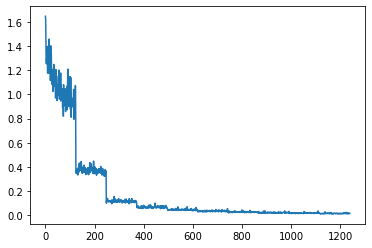

In [ ]:
plt.plot(loss_values)

Here we sum over the two embedding matrices (as per recommendation of the original paper) to improve results. We then plot the TSNE space of the top 300 words to validate our word embeddings.

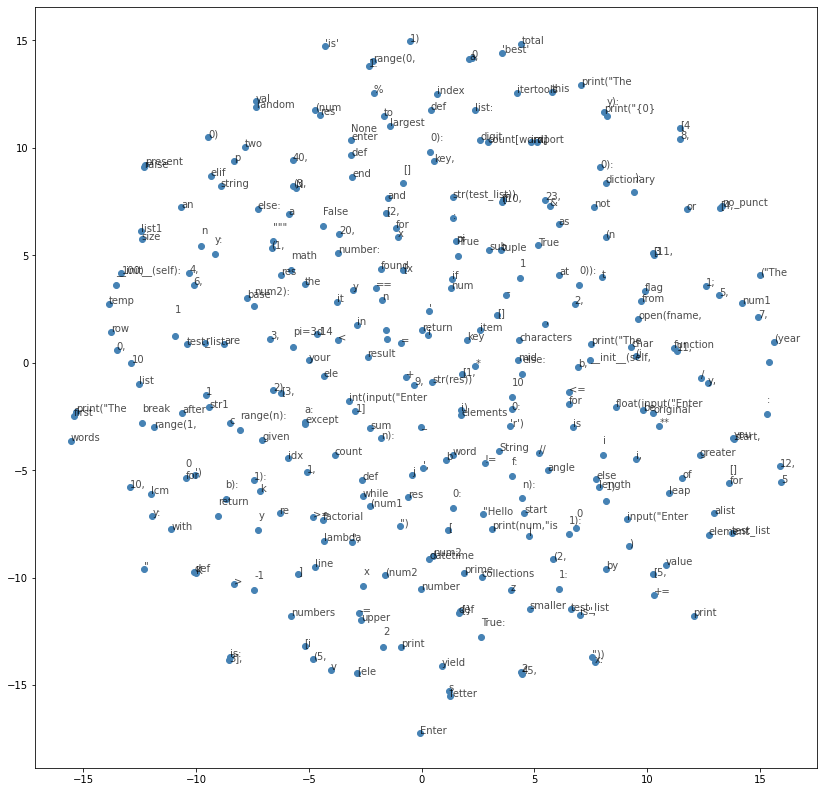

In [ ]:
emb_i = glove.wi.weight.cpu().data.numpy()
emb_j = glove.wj.weight.cpu().data.numpy()
emb = emb_i + emb_j
top_k = 300
tsne = TSNE(metric='cosine', random_state=123)
embed_tsne = tsne.fit_transform(emb[:top_k, :])
fig, ax = plt.subplots(figsize=(14, 14))
for idx in range(top_k):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(dataset._id2word[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)


Checking the words that are close, we can say that our model performs pretty good! We can check that it clusters the direction words north, south, west, east and even central. It also clusters together words with their plural form like system/systems and language/languages.